In [1]:
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read the IBD 16S data

In [2]:
otu = pd.read_csv("ibd_16s/RC2_16S_IBD_OTU.tsv.gz", delimiter="\t", compression='gzip')
otu = otu.set_index('SequenceID')
meta = pd.read_csv("ibd_16s/RC2_16S_IBD_metadata.tsv.gz", delimiter="\t", compression='gzip')
tax = pd.read_csv("ibd_16s/RC2_16S_IBD_taxadata.tsv.gz", delimiter="\t", compression='gzip')
tax = tax.set_index('SequenceID')
otu

,10565,10566,10567,10570,10572,10573,10574,10575,10576,10580,...,Parkes.Water.G.M878,Parkes.Water.H.M878,Parkes.Water.I.M878,Parkes.Water.J.M878,Parkes.Water.K.M878,Parkes.Water.L.M878,Parkes.Water.M.M878,Parkes.Water.N.M879,Parkes.Water.O.M880,Parkes.Water.P.M881
SequenceID,,,,,,,,,,,,,,,,,,,,,
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,162,2088,2671,3023,0,1140,2130,2356,0,0,...,0,7,0,0,0,0,0,0,0,0
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,239,631,1229,2131,0,371,731,1719,0,0,...,0,0,0,0,52,0,0,0,0,0
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,38,1552,5784,33,0,1140,3651,5006,0,0,...,0,0,0,0,0,0,0,0,0,0
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,249,64,342,1761,0,130,123,329,0,10863,...,0,0,0,0,0,0,0,0,0,0
GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,0,2364,0,0,0,618,0,0,0,0,...,0,2,0,0,62,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTAGGTCACAAGCGTTGCCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCCCGGGCTCAACCTGGGAATTGCATATATGACTGCAGGACTTGAGTTTGTCAGAGGAGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGTGGAAGAACACCGATGGCGAAGGCAGCCCTCTGGGACATGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCACGCCAAGTCAGCGGTGAAATTTCCGGGCTCAACCCGGAGTGTGCCGTTGAAACTGGCGAGCTAGAGTACACAAGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCTTAGATATCACACAGAACACCGATTGCGAAGGCAGCTTTCCAAGCTATTACTGACGCTGAGGCACGAAAGCGTGGGGAGCGAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGTGGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTCAAGCTAGAGTGCAGGAGAAGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCTTACTAAACCATAACTGACACTGAAGCACGAAAGCGTGGGGATCAAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
wehave = set()
with open("freezer.txt", 'r') as f:
    for l in f:
        l = l.strip()
        if l:
            wehave.add(int(l))
wehave

{33855,
 33856,
 33857,
 33858,
 33859,
 33860,
 33861,
 33862,
 33863,
 33865,
 33866,
 33867,
 33868,
 33869,
 33870,
 33871,
 33872,
 33877,
 33878,
 33879,
 33880,
 33881,
 33882,
 33883,
 33884,
 33887,
 33888,
 33890,
 33891,
 33893,
 33895,
 33896,
 33897,
 33898,
 33901,
 33902,
 33906,
 33907,
 33908,
 33909,
 33910,
 33911,
 33913,
 33914,
 33915,
 33916,
 33917,
 33922,
 33924,
 33925,
 33926,
 33929,
 33931,
 33932,
 33936,
 33937,
 33939,
 33940,
 33941,
 33942,
 33943,
 33947,
 33949,
 33950,
 33951,
 33953,
 33954,
 33955,
 33957,
 33958,
 33959,
 33960,
 33961,
 33963,
 33964,
 33965,
 33966,
 33968,
 33969,
 33970,
 33972,
 33973,
 33974,
 33975,
 33976,
 33978,
 33979,
 33980,
 33981,
 33982,
 33983,
 33984,
 33988,
 33989,
 33991,
 33992,
 33993,
 33995,
 33996,
 33997,
 33998,
 33999,
 34000,
 34001,
 34002,
 34003,
 34006,
 34007,
 34008,
 34009,
 34010,
 34011,
 34012,
 34013,
 34015,
 34018,
 34019,
 34020,
 34022,
 34024,
 34027,
 34028,
 34029,
 34030,
 34031,


In [5]:
pv = pd.read_csv('picobirnaviridae_contig_count_table.tsv.gz', delimiter="\t", compression='gzip')
pv

,sample,contig,length,reads,RPKM,FPKM,SPM,AverageFold,ReferenceGC,CoveragePercentage,coverageBases,MedianFold
0,7544,contig_102265,1524,4,1.38,1.38,5.14,0.81,0.4337,26.57,405,1.46
1,7544,contig_115141,1423,3,1.11,0.74,3.74,0.59,0.4329,42.16,600,0.76
2,7544,contig_147529,1247,4,1.68,1.68,6.54,1.02,0.4338,37.37,466,1.35
3,7544,contig_158706,1079,64,31.15,31.15,125.67,19.70,0.4217,100.00,1079,11.30
4,7544,contig_217056,1035,6,3.04,3.04,9.17,1.44,0.4415,47.92,496,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...
709,38208,contig_139115,1282,2,0.61,0.61,1.00,0.46,0.4610,28.08,360,0.78
710,38209,contig_58328,2220,25,8.09,7.77,25.07,3.48,0.4667,20.18,448,7.29
711,38210,contig_58328,2220,179,29.33,29.17,34.11,20.49,0.4667,27.75,616,42.13
712,38211,contig_121925,1378,2,0.69,0.69,2.55,0.50,0.4862,33.45,461,0.77


In [6]:
pvshort = pv[['sample', 'contig', 'reads']]
pvshort

,sample,contig,reads
0,7544,contig_102265,4
1,7544,contig_115141,3
2,7544,contig_147529,4
3,7544,contig_158706,64
4,7544,contig_217056,6
...,...,...,...
709,38208,contig_139115,2
710,38209,contig_58328,25
711,38210,contig_58328,179
712,38211,contig_121925,2


In [7]:
pvsp = pvshort.pivot(index='contig', columns='sample', values='reads')
pvsp.columns = pvsp.columns.map(str)
pvsp

sample,7544,7547,7548,7550,7556,7559,7562,7564,7568,7574,...,38188,38190,38194,38195,38197,38200,38208,38209,38210,38211
contig,,,,,,,,,,,,,,,,,,,,,
contig_101788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_102265,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_104891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_105398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_111273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_115141,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_118080,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_121925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
contig_128541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
jn = pd.concat([otu, pvsp])
jn

,10565,10566,10567,10570,10572,10573,10574,10575,10576,10580,...,35684,35713,38055,38058,38120,38177,38181,38182,38200,38211
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,162.0,2088.0,2671.0,3023.0,0.0,1140.0,2130.0,2356.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,239.0,631.0,1229.0,2131.0,0.0,371.0,731.0,1719.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,38.0,1552.0,5784.0,33.0,0.0,1140.0,3651.0,5006.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,249.0,64.0,342.0,1761.0,0.0,130.0,123.0,329.0,0.0,10863.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,0.0,2364.0,0.0,0.0,0.0,618.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
contig_87822,NaN,NaN,NaN,NaN,NaN,NaN,5.0,244.0,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_88794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_96545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_98183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
corrln = jn.T.corr()
corrln

,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAGAACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAAACCATGGGCTCAACCCATGAATTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGATGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGTCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATGTCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,GTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGATAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAAC,GGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAAC,...,contig_213074,contig_217056,contig_220792,contig_225044,contig_58328,contig_87822,contig_88794,contig_96545,contig_98183,contig_98213
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,1.000000,0.156398,0.507410,0.157793,0.046198,0.409191,0.201086,0.272697,0.321753,-0.064228,...,-0.342333,-0.080978,0.847835,-1.0,-0.000357,-0.267222,0.221141,-0.196564,0.755850,0.134890
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,0.156398,1.000000,0.272380,0.143553,0.002277,0.273302,0.001902,-0.019606,0.188682,0.084293,...,0.539975,0.107725,-0.100046,-1.0,-0.036930,-0.110887,-0.223488,-0.058529,0.339667,-0.614202
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,0.507410,0.272380,1.000000,0.045010,0.056856,0.470582,0.093596,0.147869,0.209630,-0.072946,...,0.051542,-0.258871,-0.482573,-1.0,0.009459,-0.203711,0.710205,-0.164913,0.817261,0.972466
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATG

In [10]:
shortco = corrln[list(otu.index)].iloc[otu.shape[0]:]
shortco

,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAGAACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAAACCATGGGCTCAACCCATGAATTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGATGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGTCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATGTCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,GTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGATAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAAC,GGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAAC,...,GTAGGGGACAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGATGCAAGTCTGAAGTGAAATACCCGGGCTCAACCTGGGAACTGCTTTGGAAACTGTATGGCTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACGGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAAGGCAAGTCTGATGTGAAAACCTAGGGCTTAACCCTGGGACTGCATTGGAAACTGTCTGGCTCGAGTGCCGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGGGTATTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGTATCCTCGAGTGCAGCAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGTGGCGAGCGTTATCCGGAATTATTGGGTGCAAAGGGTGCGTAGGCGGGATGTAAAGTCAGATGTGAAATGCCGCGGCTCAACCGCGGAGCTGCATTTGAAACTTATGTTCTTGAGTGAAGTAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCGGTGGCGAAGGCGGCTTACTGGGCTTAGACTGACGCTGAGGCACGAAAGTGTGGGGAGCAAAC,GGAGGATGCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCACGCCAAGTCAGCGGTGAAATTTCCGGGCTCAACCCGGAGTGTGCCGTTGAAACTGGCGAGCTAGAGTACACAAGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACACAGAACACCGATTGCGAAGGCAGCTTACAAATCTATATCGGACGCTGAGGCACGAAAGCGTGGGGAGCAAAC,GTAGGTCACAAGCGTTGCCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCCCGGGCTCAACCTGGGAATTGCATATATGACTGCAGGACTTGAGTTTGTCAGAGGAGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGTGGAAGAACACCGATGGCGAAGGCAGCCCTCTGGGACATGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,GGAGGATGCGAGCGTTATCCGGATTTA

In [11]:
shortco.to_csv('picobirnaviridae_correlations.tsv.gz', sep="\t", compression='gzip')

# Best correlations

Find the maximum value for each element in the list. We get the contig id, the sequence id, and the correlation

This lists the best contig/taxa correlations for each contig, and then we can take a look at some of them

In [12]:
for tpl in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    print(f"{tpl[0]} : {tpl[1]} : {tpl[2]}")

contig_101788 : GTAGGGAGCGAGCGTTGTCCGGATTTACTGGGTGTAAAGGGTGCGTAGGCGGATCTGCAAGTCAGTAGTGAAATCCCAGGGCTTAACCCTGGAACTGCTATTGAAACTGTGGGTCTTGAGTGAGGTAGAGGCAGGCGGAATTCCCGGTGTAGCGGTGAAATGCGTAGAGATCGGGAGGAACACCAGTGGCGAAGGCGGCCTGCTGGGCCTTAACTGACGCTGAGGCACGAAAGCATGGGTAGCAAAC : 0.9901515860371948
contig_102265 : GTAGGGGACAAGCGTTGTCCGGAATGACTGGGCGTAAAGGGCGCGTAGGCGGTCTGATAAGTCAGATGTGAAAGGTACCGGCTCAACCGGTGACGTGCATTTGAAACTGTCAGACTTGAGTATTGGAGAGGCAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTGCTGGACAAATACTGACGCTGAGGTGCGAAAGCGTGGGGAGCGAAC : 0.9726671994710125
contig_104891 : GTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGTGCGTAGGTGGCAGTGCAAGTCAGATGTGAAAGGCCGGGGCTCAACCCCGGAGCTGCATTTGAAACTGCTCGGCTAGAGTACAGGAGAGGCAGGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTGCTGGACTGTTACTGACACTGAGGCACGAAAGCGTGGGGAGCAAAC : 0.9993696248641885
contig_105398 : GGAGGATACGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGCTGATTAAGTCAGTGGTGAAAAGCTATGGCTCAACCATAGTCTTGCCGTTGATACTGGTTAGCTTGAGTGTAGATGA

## Are some taxa always common?
From a very cursory glance some of those appear common, but based on their counts they are all unique.

In [13]:
sum = {}
for tpl in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    sum[tpl[1]] = sum.get(tpl[1], 0) + 1
print(sum.values())

dict_values([1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


## Visualise some of the correlations

Row 1
Row 2
Row 3
Row 4
Row 5


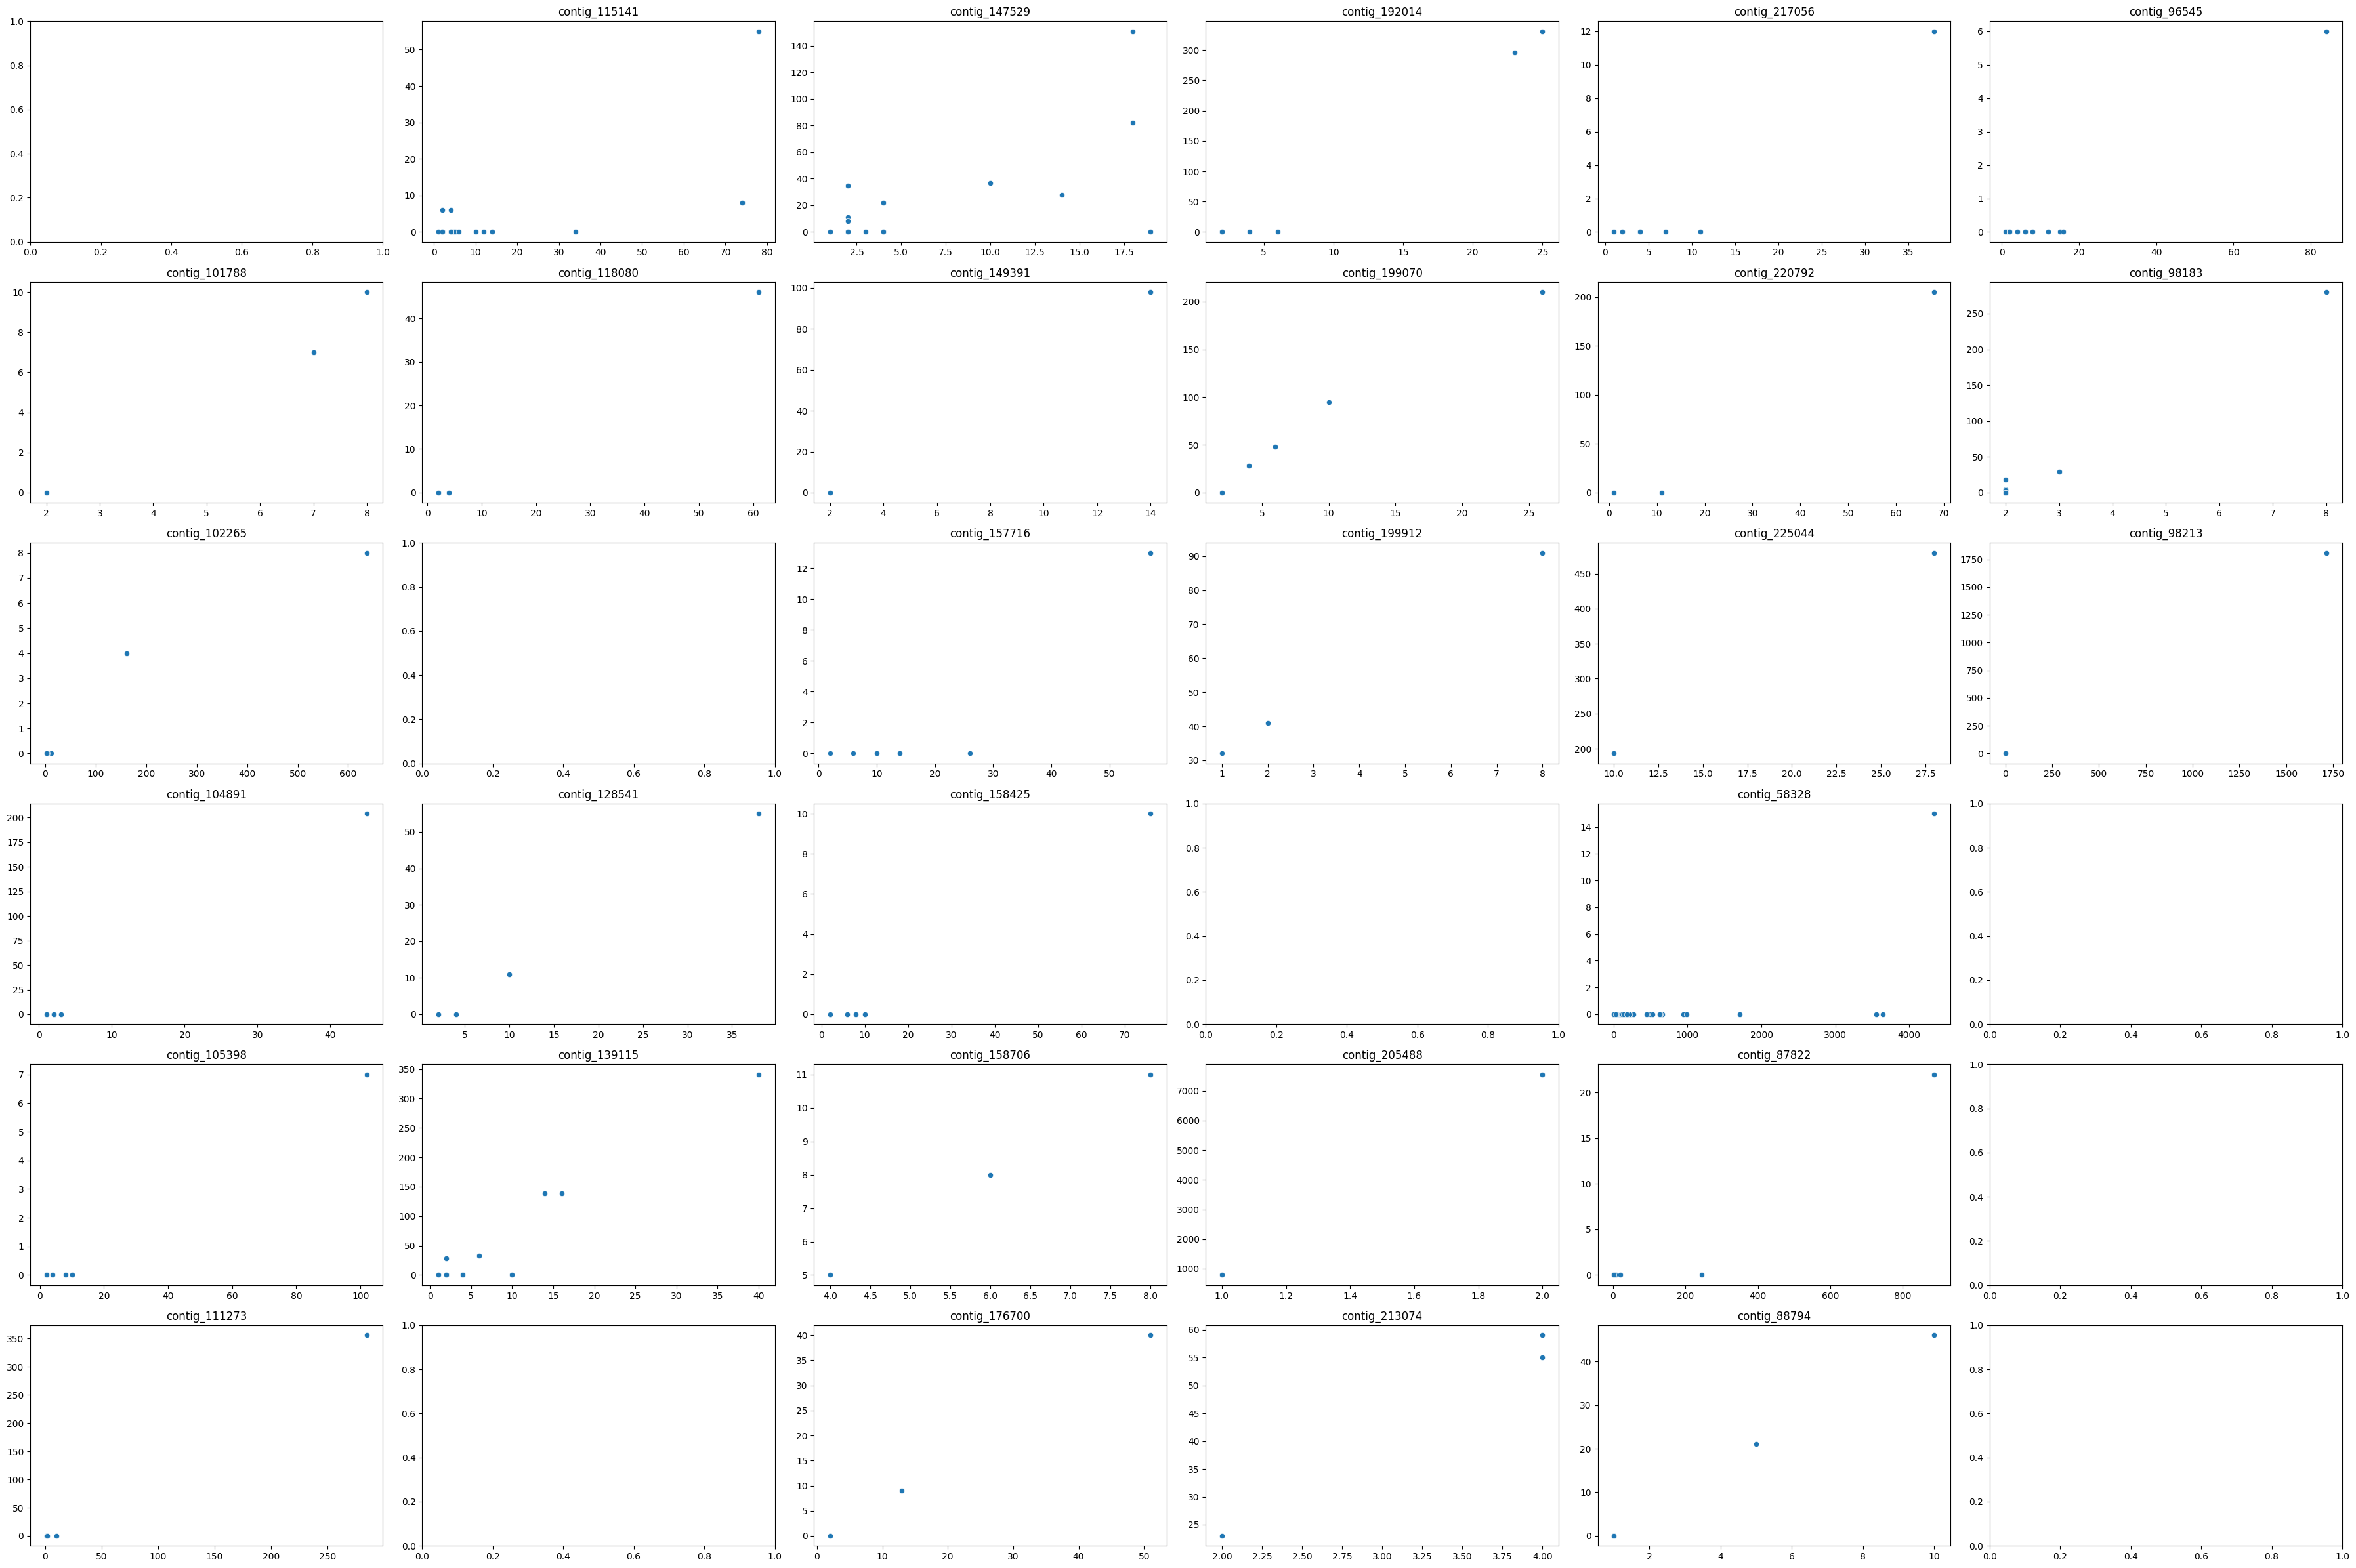

In [14]:
fig, ax = plt.subplots(figsize=(36, 24), nrows=6, ncols=6, sharey=False, sharex=False)

ix = 0
iy = 0

for tple in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    xl = tple[0]
    yl = tple[1]
    pearson = tple[2]
    ix += 1
    if ix == 6:
        ix = 0
        iy += 1
        print(f"Row {iy}", file=sys.stderr)
    if str(xl) == 'nan'  or  str(yl) == 'nan' or str(pearson) == 'nan':
        continue
    tmp = jn.loc[[xl, yl]].dropna(axis=1).T
    # reject anything with less than 10 points
    #if tmp.iloc[0].count() < 10:
    #    continue
    s = sns.scatterplot(x=xl, y=yl, data=tmp, ax=ax[ix, iy], legend=None)
    l = s.set_xlabel('')
    l = s.set_ylabel('')
    s.set_title(xl)
plt.tight_layout()
fig.savefig("picobirnaviridae.png")

# Explore contig_58328

This contig is in 422 samples, so what is it?

In [15]:
for tpl in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    if tpl[0] == 'contig_58328':
        print(f"{tpl[0]} : {tpl[1]} : {tpl[2]}")
        print(tax.loc[tpl[1]])

contig_58328 : GTAGGGAGCAAGCGTTATCCGGAATTATTGGGTGTAAAGGGTGCGTAGACGGGAAAACAAGTTAGTTGTGAAATCCCTCGGCTTAACTGAGGAACTGCAACTAAAACTGTTTTTCTTGAGTGCTGGAGAGGAAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGACAGTAACTGACGTTGAGGCACGAAAGTGTGGGGAGCAAAC : 0.6008448681830976
Kingdom         Bacteria
Phylum        Firmicutes
Class         Clostridia
Order      Clostridiales
Family               NaN
Genus                NaN
Species              NaN
Name: GTAGGGAGCAAGCGTTATCCGGAATTATTGGGTGTAAAGGGTGCGTAGACGGGAAAACAAGTTAGTTGTGAAATCCCTCGGCTTAACTGAGGAACTGCAACTAAAACTGTTTTTCTTGAGTGCTGGAGAGGAAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGACAGTAACTGACGTTGAGGCACGAAAGTGTGGGGAGCAAAC, dtype: object


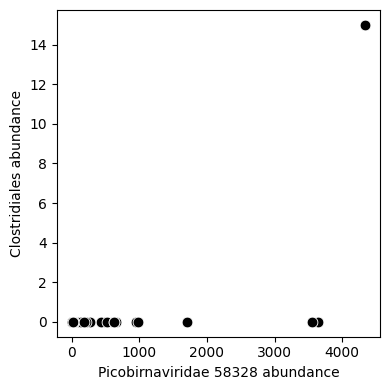

In [27]:
fig, ax = plt.subplots(figsize=(4,4))
xl = 'contig_58328'
yl = 'GTAGGGAGCAAGCGTTATCCGGAATTATTGGGTGTAAAGGGTGCGTAGACGGGAAAACAAGTTAGTTGTGAAATCCCTCGGCTTAACTGAGGAACTGCAACTAAAACTGTTTTTCTTGAGTGCTGGAGAGGAAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGACAGTAACTGACGTTGAGGCACGAAAGTGTGGGGAGCAAAC'
tmp = jn.loc[[xl, yl]].T
s = sns.scatterplot(x=xl, y=yl, ax=ax, data=tmp, legend=None, s=60, marker='o', color='k')
l = s.set_xlabel('Picobirnaviridae 58328 abundance')
l = s.set_ylabel('Clostridiales abundance')
plt.tight_layout()
fig.savefig("pb58328.png")

In [36]:
median(shortco.loc['contig_58328'].values)

NameError: name 'median' is not defined

## Explore one contig/taxa combination: contig_199070

From the above, `contig_199070` looks "interesting" so we find the taxa it best matches, and then plot just that correlation

In [16]:
for tpl in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    if tpl[0] == 'contig_199070':
        print(f"{tpl[0]} : {tpl[1]} : {tpl[2]}")
        print(tax.loc[tpl[1]])

contig_199070 : GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC : 0.9924444732673451
Kingdom           Bacteria
Phylum          Firmicutes
Class           Clostridia
Order        Clostridiales
Family     Ruminococcaceae
Genus        Oscillibacter
Species                NaN
Name: GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC, dtype: object


In [17]:
xl = 'contig_199070'
yl = 'GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC'

jn.loc[[xl, yl]].dropna(axis=1).T

,contig_199070,GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC
35536,4.0,28.0
35613,26.0,210.0
35634,6.0,48.0
35658,10.0,95.0
38046,2.0,0.0


In [18]:
tax.loc['GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC']

Kingdom           Bacteria
Phylum          Firmicutes
Class           Clostridia
Order        Clostridiales
Family     Ruminococcaceae
Genus        Oscillibacter
Species                NaN
Name: GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC, dtype: object

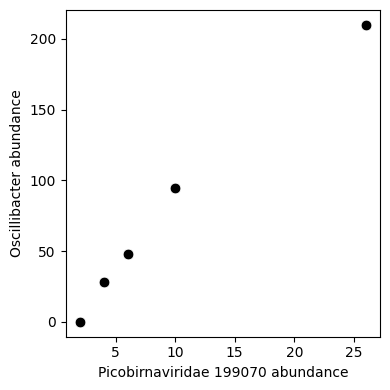

In [19]:
fig, ax = plt.subplots(figsize=(4,4))
xl = 'contig_199070'
yl = 'GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC'
tmp = jn.loc[[xl, yl]].T
s = sns.scatterplot(x=xl, y=yl, ax=ax, data=tmp, legend=None, s=60, marker='o', color='k')
l = s.set_xlabel('Picobirnaviridae 199070 abundance')
l = s.set_ylabel('Oscillibacter abundance')
plt.tight_layout()
fig.savefig("pb199070.png")

## What about the second best match?

The second best match for contig_199080 has a correlation of 0.9858535374075753 

In [20]:
xl2 = 'contig_199070'
shortco.loc[xl2].sort_values(ascending=False)

GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC                                                0.992444
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGGTCGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC                                                0.985854
GTAGGGAGCGAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGAAGGCAAGTTGGATGTGAAAACTGTGGGCTCAACCGACAGACTGCATTCAAAACTGTTTTTCTTGAGTGAAGTAGAGGCAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTGCTGGGCTTTTACTGACGCTGAGGCTCGAAAGTGTGGGGAGCAAAC                                                0.984858
GGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCCTATAAGTCAGCGGTGAAATGTTCCGGCTCAACC

In [21]:
yl = 'GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGGTCGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC'
tax.loc[yl]

Kingdom            Bacteria
Phylum           Firmicutes
Class            Clostridia
Order         Clostridiales
Family      Ruminococcaceae
Genus      Faecalibacterium
Species         prausnitzii
Name: GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGGTCGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC, dtype: object

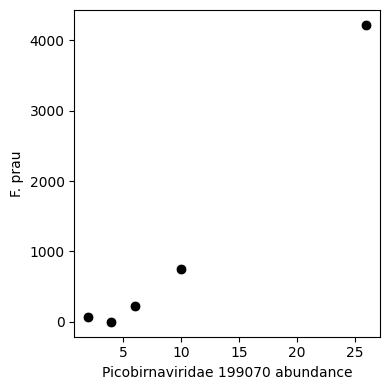

In [22]:
fig, ax = plt.subplots(figsize=(4,4))
xl = 'contig_199070'
yl = 'GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGGTCGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC'
tmp = jn.loc[[xl, yl]].dropna(axis=1).T
s = sns.scatterplot(x=xl, y=yl, ax=ax, data=tmp, legend=None, s=60, marker='o', color='k')
l = s.set_xlabel('Picobirnaviridae 199070 abundance')
l = s.set_ylabel('F. prau')
plt.tight_layout()
fig.savefig("pb199070_2.png")

### Plot both data side by side to see what we see?

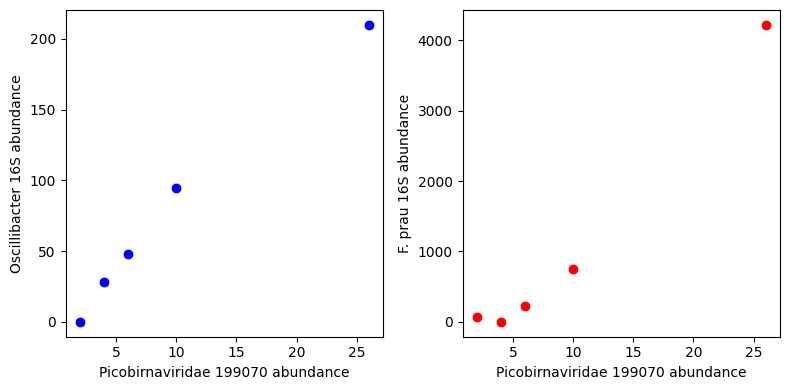

In [23]:
fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=2, sharey=False)
xl = 'contig_199070'

yl = 'GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC'
tmp = jn.loc[[xl, yl]].T
s = sns.scatterplot(x=xl, y=yl, ax=ax[0], data=tmp, legend=None, s=60, marker='o', color='b')
l = s.set_xlabel('Picobirnaviridae 199070 abundance')
l = s.set_ylabel('Oscillibacter 16S abundance')


yl = 'GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGGTCGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC'
tmp = jn.loc[[xl, yl]].dropna(axis=1).T
s1 = sns.scatterplot(x=xl, y=yl, ax=ax[1], data=tmp, legend=None, s=60, marker='o', color='r')
l = s1.set_xlabel('Picobirnaviridae 199070 abundance')
l = s1.set_ylabel('F. prau 16S abundance')
plt.tight_layout()
fig.savefig("pb199070_both.png")

### Are these the same samples in both figures?

In [24]:
xl = 'contig_199070'
y1 = 'GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC'
y2 = 'GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGGTCGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC'


tmp = jn.loc[[xl, y1, y2]].dropna(axis=1).T.rename(columns = {
    'GTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTGCGCAAGTCAGATGTGAAATCTCAGGGCTCAACCCTGAAACTGCATTTGAAACTGTGCATCTTGAGTGCCGGAGAGGTAATCGGAATTCCTTGTGTAGCGGTGAAATGCGTAGATATAAGGAAGAACACCAGTGGCGAAGGCGGATTACTGGACGGTAACTGACGGTGAGGCGCGAAAGCGTGGGGAGCAAAC' : "Oscillibacter",
    'GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGGTCGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC' : "F. prau"
})
tmp


,contig_199070,Oscillibacter,F. prau
35536,4.0,28.0,0.0
35613,26.0,210.0,4217.0
35634,6.0,48.0,229.0
35658,10.0,95.0,748.0
38046,2.0,0.0,67.0


### Notes:

1. These _are_ the same samples
2. There is no _F. prau_ in 35536 but there is _some_ Piicobirnaviridae. 

### Can we find the other segment?

This has a really interesting phenotype - it is only present in 5 samples and is highly correlated. Can we find another contig that is _only_ in these samples, and correlates with this contig (and thus correlates with the organism)?

I did this with the code `find_pb_segment2.pl`

# Explore other contigs

In [25]:
wanted = ['contig_147529', 'contig_98183', 'contig_139115']
for tpl in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    if tpl[0] in wanted:
        print(f"{tpl[0]} : {tpl[1]} : {tpl[2]}")
        print(tax.loc[tpl[1]])
        print()

contig_139115 : GTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTGCTTAGGTCTGATGTGAAAGCCTTCGGCTTAACCGAAGAAGTGCATCGGAAACCGGGCGACTTGAGTGCAGAAGAGGACAGTGGAACTCCATGTGTAGCGGTGGAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTGTCTGGTCTGCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCGAAC : 0.9674553059204372
Kingdom            Bacteria
Phylum           Firmicutes
Class               Bacilli
Order       Lactobacillales
Family     Lactobacillaceae
Genus         Lactobacillus
Species                 NaN
Name: GTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTGCTTAGGTCTGATGTGAAAGCCTTCGGCTTAACCGAAGAAGTGCATCGGAAACCGGGCGACTTGAGTGCAGAAGAGGACAGTGGAACTCCATGTGTAGCGGTGGAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTGTCTGGTCTGCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCGAAC, dtype: object

contig_147529 : GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCTGTTTTTTAAGTTAGAGGTGAAAGCTCGACGCTCAACGTCGAAATTGCCTCTGATACTGAGAGACTAGAGTGTAGTTGCGGAAGGCGGAATGTGTGGTGTAGCGGTGAAATGCTTAGATATCACACAGAACACCGATTGCGAAGGCAGCTTTCCAAGCTATTACTGACGCTGAGGCACGAAAG

# What do we have at Flinders?

In [26]:
t='GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC'
s = fl_samples[0]
otu.at[t,s]

NameError: name 'fl_samples' is not defined

In [ ]:
fl_samples = ['33866', '33917']
otu[fl_samples].sort_values(by=fl_samples[::-1], ascending=False)

In [ ]:
for idx in 0, 1:
    print(f"\nGenus species present in {fl_samples[idx]} : (number of 16S reads)")
    for t in otu[fl_samples].sort_values(by=fl_samples[idx], ascending=False).index[0:10]:
        sp = tax.loc[t].Species
        if str(sp) == 'nan':
            sp = 'spp.'
        print(f"\t{tax.loc[t].Genus} {sp} : {otu.at[t,fl_samples[idx]]}")

In [ ]:
otu[['7571']].sort_values('7571', ascending=False)

In [ ]:
t= 'GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATGTCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC'
tax.loc[t]